In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову:

In [11]:
milk = pd.read_csv('monthly-milk-production.csv', delimiter=';', index_col=['month'], parse_dates=['month'], dayfirst=True)
milk

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


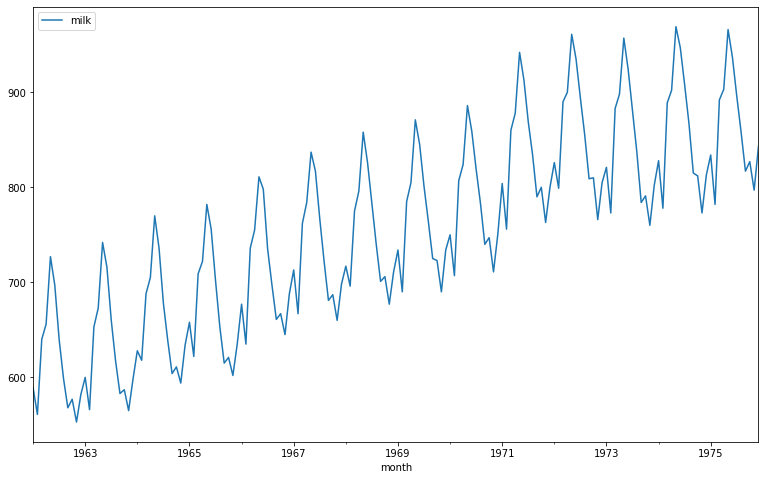

In [10]:
milk.plot(figsize=(13, 8))

Примените к ряду из предыдущего вопроса критерий Дики-Фуллера.

In [13]:
sm.tsa.stattools.adfuller(milk)

(-1.3038115874221297,
 0.6274267086030316,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

p = 0.6274267086030316

Ряд нестационарный

Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце можно с помощью свойства days_in_month у индекса ряда или функции monthrange из пакета calendar. Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.

В качестве ответа введите сумму значений полученного показателя за весь период; округлите до двух знаков после десятичной точки.

In [29]:
milk.index.days_in_month

Int64Index([31, 28, 31, 30, 31, 30, 31, 31, 30, 31,
            ...
            31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
           dtype='int64', name='month', length=168)

In [24]:
milk

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [33]:
milk_daily = milk.divide(milk.index.days_in_month, axis=0)
milk_daily

,milk
month,
1962-01-01,19.000000
1962-02-01,20.035714
1962-03-01,20.645161
1962-04-01,21.866667
1962-05-01,23.451613
...,...
1975-08-01,27.677419
1975-09-01,27.233333
1975-10-01,26.677419


Загрузите ряд, создайте новый ряд значений среднего дневного уровня производства молока в фунтах на одну корову, поделив на число дней в месяце (вычисляется с помощью функции monthrange из пакета calendar). Постройте график полученного ряда; какой из приведённых ниже графиков у вас получился?

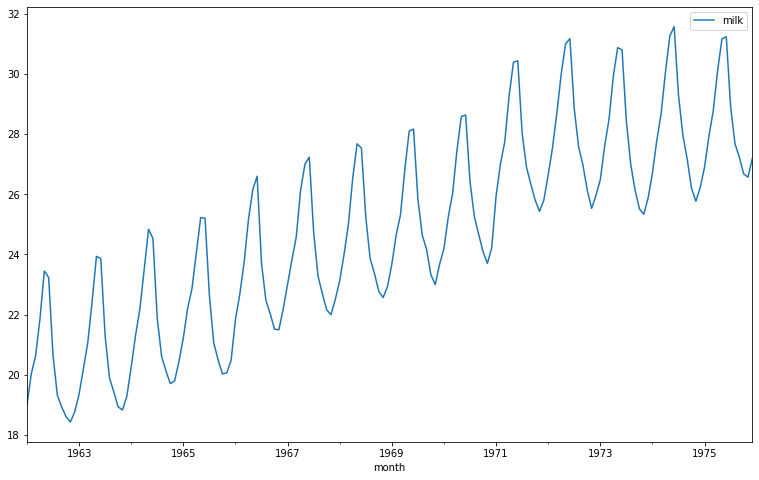

In [34]:
milk_daily.plot(figsize=(13, 8))

In [40]:
sm.tsa.stattools.adfuller(milk_daily)

(-1.179821637326598,
 0.6822151513081465,
 12,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 -1.5708067458066353)

In [35]:
milk_daily.sum()

milk    4166.326662
dtype: float64

Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерий Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

In [38]:
milk_daily_diff_1 = milk_daily - milk_daily.shift(1)
milk_daily_diff_1

,milk
month,
1962-01-01,NaN
1962-02-01,1.035714
1962-03-01,0.609447
1962-04-01,1.221505
1962-05-01,1.584946
...,...
1975-08-01,-1.225806
1975-09-01,-0.444086
1975-10-01,-0.555914


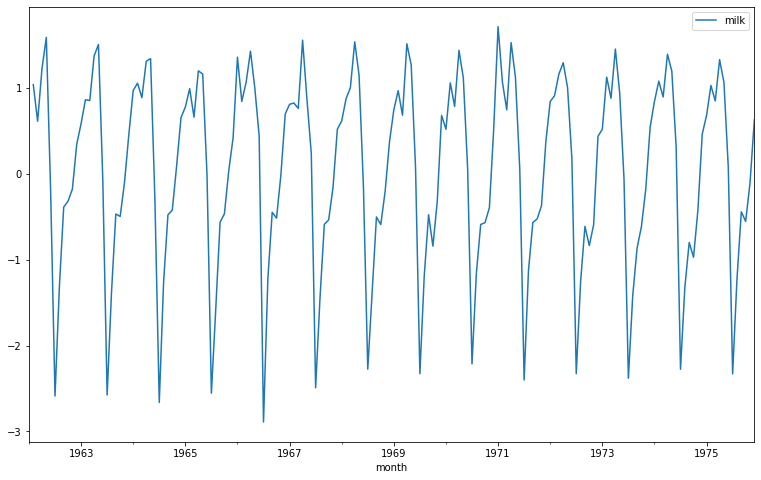

In [39]:
milk_daily_diff_1.plot(figsize=(13, 8))

In [43]:
sm.tsa.stattools.adfuller(milk_daily_diff_1[1:])

(-2.759469476228918,
 0.06430054654174584,
 11,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 -1.1539973381055688)

p = 0.06430054654174584

Ряд всё ещё нестационарен

In [44]:
milk_daily_diff_12 = milk_daily - milk_daily.shift(12)
milk_daily_diff_12

,milk
month,
1962-01-01,NaN
1962-02-01,NaN
1962-03-01,NaN
1962-04-01,NaN
1962-05-01,NaN
...,...
1975-08-01,-0.290323
1975-09-01,0.066667
1975-10-01,0.483871


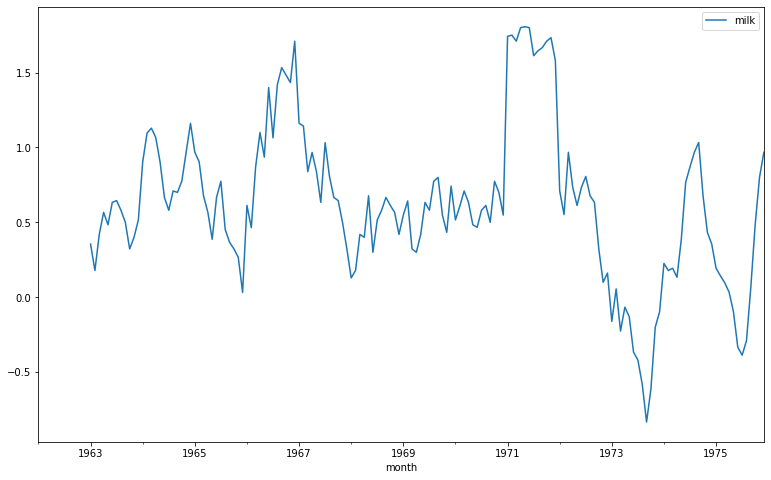

In [45]:
milk_daily_diff_12.plot(figsize=(13, 8))

In [46]:
sm.tsa.stattools.adfuller(milk_daily_diff_12[12:])

(-2.1594860932888085,
 0.22127672658830344,
 12,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -25.225679141303317)

p = 0.22127672658830344

Ряд всё ещё нестационарен

In [56]:
milk_daily_diff_12_1 = milk_daily_diff_12 - milk_daily_diff_12.shift(1)
milk_daily_diff_12_1

,milk
month,
1962-01-01,NaN
1962-02-01,NaN
1962-03-01,NaN
1962-04-01,NaN
1962-05-01,NaN
...,...
1975-08-01,0.096774
1975-09-01,0.356989
1975-10-01,0.417204


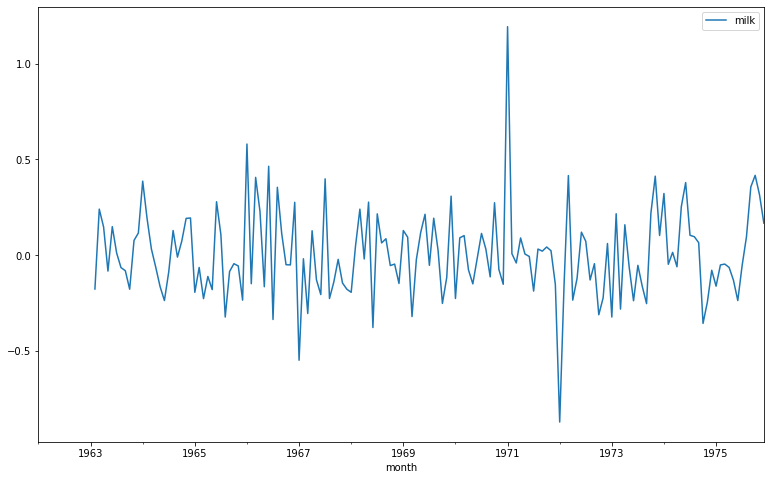

In [57]:
milk_daily_diff_12_1.plot(figsize=(13, 8))

In [60]:
sm.tsa.stattools.adfuller(milk_daily_diff_12_1[13:])

(-5.481326334796928,
 2.2808455518037136e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -20.90513750989237)

р = 2.2808455518037136e-06

Ряд стационарен

Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции.

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA?

In [69]:
milk_daily_diff_12_1[13:].values

array([[-0.17626728],
       [ 0.24078341],
       [ 0.14731183],
       [-0.0827957 ],
       [ 0.14946237],
       [ 0.01182796],
       [-0.06451613],
       [-0.08064516],
       [-0.17741935],
       [ 0.07741935],
       [ 0.11612903],
       [ 0.38709677],
       [ 0.19283331],
       [ 0.03297314],
       [-0.06236559],
       [-0.16344086],
       [-0.23655914],
       [-0.08602151],
       [ 0.12903226],
       [-0.00967742],
       [ 0.07419355],
       [ 0.19247312],
       [ 0.19462366],
       [-0.19354839],
       [-0.06380105],
       [-0.22652153],
       [-0.11075269],
       [-0.17956989],
       [ 0.27956989],
       [ 0.10752688],
       [-0.32258065],
       [-0.08494624],
       [-0.04408602],
       [-0.05591398],
       [-0.2344086 ],
       [ 0.58064516],
       [-0.14861751],
       [ 0.40668203],
       [ 0.22903226],
       [-0.16451613],
       [ 0.46451613],
       [-0.33548387],
       [ 0.35483871],
       [ 0.11397849],
       [-0.04946237],
       [-0

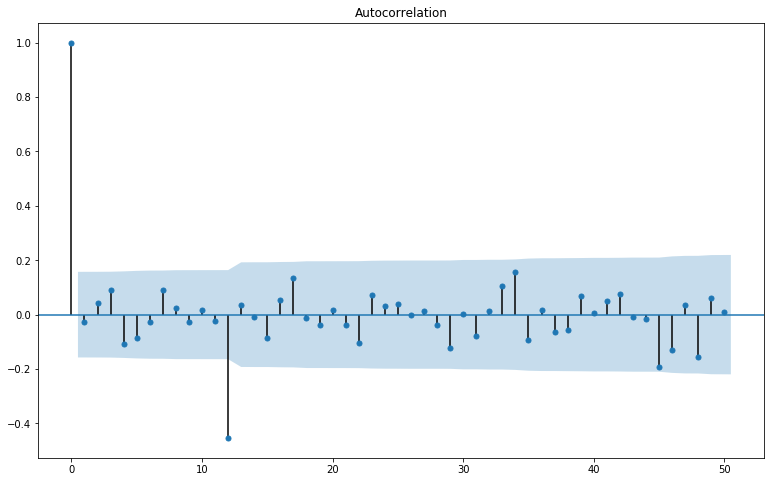

In [72]:
fig, ax = plt.subplots(figsize=(13, 8))
sm.graphics.tsa.plot_acf(milk_daily_diff_12_1[13:].values.squeeze(), lags=50, ax=ax)
plt.show()

Q = 1

Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции.

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра pp в модели SARIMA?

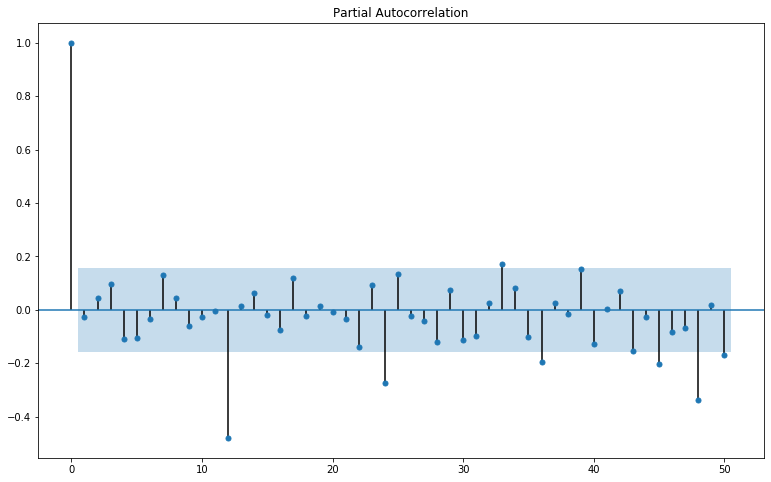

In [74]:
fig, ax = plt.subplots(figsize=(13, 8))
sm.graphics.tsa.plot_pacf(milk_daily_diff_12_1[13:].values.squeeze(), lags=50, ax=ax)
plt.show()